In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [6]:
hospital = pd.read_csv('./hospital.csv', index_col=0, parse_dates=True)
hospital.head()

,wait_times_hrs,nurse_count
2019-03-04 00:00:00,1.747261,1.0
2019-03-04 01:00:00,1.664634,1.0
2019-03-04 02:00:00,1.647047,1.0
2019-03-04 03:00:00,1.619512,1.0
2019-03-04 04:00:00,1.480415,1.0


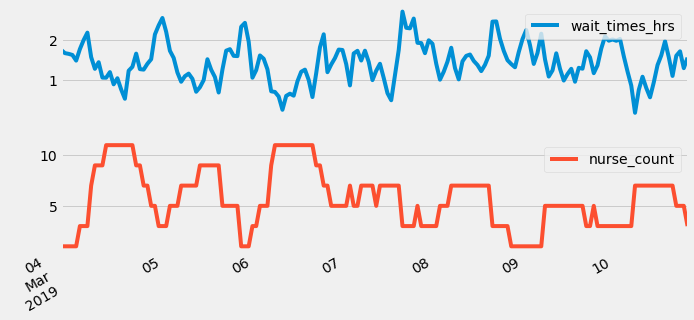

In [7]:
hospital.plot(subplots=True);

In [8]:
model = ARIMA(hospital['wait_times_hrs'], order=(3,0, 1), exog=hospital['nurse_count'])
results = model.fit()
print(results.summary())

/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 -10.939
Date:                Thu, 06 Apr 2023   AIC                             35.878
Time:                        10:49:28   BIC                             57.746
Sample:                    03-04-2019   HQIC                            44.753
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1140      0.091     23.151      0.000       1.935       2.293
nurse_count    -0.1197      0.013     -9.567      0.000      -0.144      -0.095
ar.L1           1.0145      0.386      2.629    

In [12]:
f_exog = [10, 1, 20, 5, 30]

In [13]:
fcast = results.forecast(steps=5, exog=f_exog)

In [14]:
fcast

2019-03-11 00:00:00    0.877922
2019-03-11 01:00:00    2.024352
2019-03-11 02:00:00   -0.272588
2019-03-11 03:00:00    1.497620
2019-03-11 04:00:00   -1.494637
Freq: H, Name: predicted_mean, dtype: float64

In [5]:
utilData = pd.read_csv('./Util_IdleRun.csv')
utilData.head()

,memUse,memTot,memfreq,cpuidle,cpufreq
0,870692,11552205,413000000,76.5,1100000
1,1158324,10912213,825000000,76.5,800000
2,983824,8714833,543000000,76.5,900000
3,954,41007,275000000,95.2,700000
4,703928,8968957,165000000,94.1,800000


In [6]:
utilData['cpuidle']=100.0-utilData['cpuidle']

In [10]:
utilData.head()

,memUse,memTot,memfreq,cpuidle,cpufreq
0,870692,11552205,413000000,23.5,1100000
1,1158324,10912213,825000000,23.5,800000
2,983824,8714833,543000000,23.5,900000
3,954,41007,275000000,4.8,700000
4,703928,8968957,165000000,5.9,800000


In [13]:
utilData['memLoad'] = utilData['memUse']/utilData['memTot']

In [14]:
utilData.head()

,memUse,memTot,memfreq,cpuidle,cpufreq,memLoad
0,870692,11552205,413000000,23.5,1100000,0.075370
1,1158324,10912213,825000000,23.5,800000,0.106149
2,983824,8714833,543000000,23.5,900000,0.112891
3,954,41007,275000000,4.8,700000,0.023264
4,703928,8968957,165000000,5.9,800000,0.078485


In [20]:
model = ARIMA(utilData['cpuidle'], order=(3,0, 1), exog=utilData['cpufreq'])

In [21]:
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                cpuidle   No. Observations:                   60
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -187.813
Date:                Tue, 11 Apr 2023   AIC                            389.625
Time:                        18:05:09   BIC                            404.285
Sample:                             0   HQIC                           395.360
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5914      3.084     -0.840      0.401      -8.635       3.452
cpufreq     1.225e-05   3.71e-06      3.302      0.001    4.98e-06    1.95e-05
ar.L1          0.2412      7.911      0.030      0.9

/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
memFreq= []